In [ ]:
%config Completer.use_jedi=False # comment if not needed

#Import pandas library
import pandas as pd

#Import numpy library
import numpy as np

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


#### Load the dataset

In [ ]:
# Reading the dataset in a dataframe
df = pd.read_csv('/content/cancer_dataset.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# Print unique values of the target columns of the dataset
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    print(f"Unique values in {target}: {df[target].unique()}")

# This is to determine whether this dataset is classification or regression problem

Unique values in Hinselmann: [0 1]
Unique values in Schiller: [0 1]
Unique values in Citology: [0 1]
Unique values in Biopsy: [0 1]


In [ ]:
# Display the first 10 rows of the dataset
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34,3.4,0,0,1,...,?,?,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0,0,1,2,1,...,?,?,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,?,?,1,0,1,1,0,0,0,0
9,44,3,15,?,1,1.266972909,2.8,0,0,?,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# Display all the information of the dataset
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all the columns of the dataset
df1 = pd.DataFrame(df.columns)
df1.columns = ['features']
df1

,features
0,Age
1,Number of sexual partners
2,First sexual intercourse
3,Num of pregnancies
4,Smokes
5,Smokes (years)
6,Smokes (packs/year)
7,Hormonal Contraceptives
8,Hormonal Contraceptives (years)
9,IUD


In [ ]:
# Check for non-numeric values
non_numeric_columns = df.columns[df.apply(lambda col: pd.to_numeric(col, errors='coerce').isna().any())]

print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis'],
      dtype='object')


In [ ]:
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# If you have '?' values, replace them with NaN first and then drop rows with NaN
df.replace('?', np.nan, inplace=True)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
# List of columns with missing boolean values
bool_columns = [
    'Smokes',
    'Hormonal Contraceptives',
    'IUD',
    'STDs',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV'
]


# Impute bool columns with mode
for column in bool_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [ ]:
# Verify that there are no NaN values left in the boolean columns
print(df[bool_columns].isna().sum())

Smokes                                0
Hormonal Contraceptives               0
IUD                                   0
STDs                                  0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
dtype: int64


In [ ]:
# List of columns with missing numeric values
numeric_columns = [
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'STDs (number)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'Smokes (packs/year)',
]

# Convert columns to numeric (errors='coerce' converts non-numeric values to NaN)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute numeric columns with mean
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
# Verify that there are no NaN values left in the numeric columns
print(df[numeric_columns].isna().sum())

Number of sexual partners          0
First sexual intercourse           0
Num of pregnancies                 0
Smokes (years)                     0
STDs (number)                      0
Hormonal Contraceptives (years)    0
IUD (years)                        0
Smokes (packs/year)                0
dtype: int64


In [ ]:
#Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


#### Split the dataset
Split the dataset into training, validation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Biopsy', 'Hinselmann', 'Schiller', 'Citology'])
y = df[['Biopsy', 'Hinselmann', 'Schiller', 'Citology']]

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42) # 10% of 80% = 8% of total data

# Display the sizes of the resulting sets
print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_val))
print("Test Set Size:", len(X_test))

Training Set Size: 600
Validation Set Size: 86
Test Set Size: 172


In [ ]:
# Print the shape of each data

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_val.shape)
print("Shape of y_validation: ", y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (600, 30)
Shape of y_train:  (600, 4)
Shape of X_validation:  (86, 30)
Shape of y_validation:  (86, 4)
Shape of X_test:  (172, 30)
Shape of y_test:  (172, 4)


In [ ]:
# Show the first 5 rows of X_train set

X_train.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
417,19,2.527644,17.0,2.0,0,0.0,0.0,1,2.256419,0,...,0,0,0,0,0,0,0,0,0,0
412,18,2.000000,15.0,1.0,0,0.0,0.0,1,2.256419,0,...,0,0,0,0,0,0,0,0,0,0
363,18,1.000000,15.0,1.0,0,0.0,0.0,1,0.330000,0,...,0,0,0,0,0,0,0,0,0,0
409,17,2.000000,15.0,1.0,0,0.0,0.0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
555,26,3.000000,17.0,3.0,0,0.0,0.0,1,0.420000,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Show the first 5 rows of X_val set

X_val.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
107,33,5.0,19.0,1.0,1,4.0,0.513202,1,2.282201,0,...,0,0,0,0,0,0,0,0,0,0
747,21,1.0,18.0,1.0,0,0.0,0.000000,1,2.000000,0,...,0,0,0,0,0,0,0,0,0,0
667,79,2.0,16.0,5.0,0,0.0,0.000000,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
635,36,2.0,16.0,5.0,0,0.0,0.000000,1,0.160000,0,...,0,0,0,0,0,0,0,0,0,0
796,31,7.0,16.0,5.0,0,0.0,0.000000,1,1.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Show the first 5 rows of X_test set

X_test.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
713,16,1.0,16.0,1.0,0,0.0,0.000,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
604,23,3.0,17.0,2.0,0,0.0,0.000,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
120,33,1.0,16.0,4.0,0,0.0,0.000,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
208,27,4.0,16.0,1.0,0,0.0,0.000,1,0.67,0,...,0,0,0,0,0,0,0,0,0,0
380,18,3.0,15.0,1.0,1,2.0,0.003,1,0.58,0,...,0,0,0,0,0,0,0,0,0,0


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
**Description:** We scaled the features to standardize the cleaned data using the StandardScaler from Scikit-learn. We fitted the scaler on the training data and transformed the training data to ensure that the model is trained on standardized features. We then used the same scaler (fitted on the training data) to transform the validation and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the scaler fitted on the training data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the sizes of the resulting sets (Optional)
print("Scaled Training Set Size:", X_train_scaled.shape)
print("Scaled Validation Set Size:", X_val_scaled.shape)
print("Scaled Test Set Size:", X_test_scaled.shape)

Scaled Training Set Size: (600, 30)
Scaled Validation Set Size: (86, 30)
Scaled Test Set Size: (172, 30)


#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
**Description:** We used the VarianceThreshold from Scikit-learn to eliminate features with zero variance, meaning they had the same value across all samples. We employed the SelectKBest method with the f_classif scoring function to select the top 13 features based on their ANOVA F-value scores. We fitted SelectKBest to the non-constant features in the training data for each target variable in y_train. The selected features for each target were then identified and stored.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

# Assuming X_train_scaled and y_train are your training features and labels after scaling

# Initialize VarianceThreshold with threshold=0
selector = VarianceThreshold(threshold=0)

# Fit to data, this removes constant features
selector.fit(X_train_scaled)

# Get indices of non-constant features
non_constant_indices = selector.get_support(indices=True)

# Select non-constant features from X_train_scaled
X_train_non_constant = X_train_scaled[:, non_constant_indices]

# Initialize SelectKBest with f_classif scoring function
select_k_best = SelectKBest(score_func=f_classif, k=13)  # Select top 13 features

# Initialize a dictionary to store selected features for each target
selected_features = {}

# Iterate over each target
for target_column in y_train.columns:
    # Fit SelectKBest to training data for the current target
    select_k_best.fit(X_train_non_constant, y_train[target_column])

    # Get indices of selected features
    selected_features_indices = select_k_best.get_support(indices=True)

    # Get the names of selected features
    selected_features_names = X.columns[selected_features_indices]

    # Store selected features for the current target
    selected_features[target_column] = selected_features_names

# Print the names of the top 13 selected features for each target
for target_column, features in selected_features.items():
    print(f"Top 13 selected features for target '{target_column}':")
    for feature in features:
        print(feature)

Top 13 selected features for target 'Biopsy':
Smokes (years)
Hormonal Contraceptives (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:vaginal condylomatosis
STDs:pelvic inflammatory disease
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
Top 13 selected features for target 'Hinselmann':
Num of pregnancies
Smokes
Smokes (years)
IUD
STDs
STDs (number)
STDs:condylomatosis
STDs:vaginal condylomatosis
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:HPV
STDs: Number of diagnosis
Top 13 selected features for target 'Schiller':
Age
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:vaginal condylomatosis
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:HPV
STDs: Number of diagnosis
Top 13 selected features for target 'Citology':
Number of sexual partners
Num of pregnancies
Smokes (years)
Hormonal Contraceptives (years)
IUD
STDs (number)
STDs:condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-p

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

Our group build 2 predictive models which are Support Vector Machine (SVM) and K-Nearest Neighbor (KNN) algorithms.

Shown below are the steps in building the models.

**SVM:** Using the top 13 features identified for each target variable using SelectKBest and the ANOVA F-value method, we trained an SVM classifier with an RBF kernel for each target variable.

To optimize performance, we conducted hyperparameter tuning using RandomizedSearchCV. We defined a parameter distribution for various SVM hyperparameters and used a pipeline with StandardScaler, PCA, and SVC. The best pipelines, identified through cross-validation, were retrained on the training set and re-evaluated on the validation set.

Finally, we evaluated the optimized SVM classifiers on the test set to ensure unbiased performance estimates on unseen data.

**KNN:** We applied the K-Nearest Neighbor (KNN) algorithm to predict the target variables 'Hinselmann', 'Schiller', 'Citology' and 'Biopsy' based on the selected features.

Firstly, we used the 'SelectKBest' method with the 'f_classif' scoring function to select the top 13 features for each target variable. These features were identified as the most relevant for predicting the target variables.

Next, we trained individual KNN classifiers for each target variable using the selected features. Each classifier was configured with a neighborhood size of 5 (n_neighbors=5). This parameter represents the number of nearest neighbors considered when making predictions.

To optimize the performance of our models, we conducted hyperparameter tuning using RandomizedSearchCV. This technique allowed us to explore different values for hyperparameters such as n_neighbors, weights, and metric, seeking the combination that yielded the best cross-validated performance.

Once we identified the optimal hyperparameters, we retrained the KNN classifiers on the training set. Subsequently, we evaluated their performance on the validation set to assess how well they generalized to unseen data. During this evaluation, we computed metrics such as accuracy, precision, recall, and F1 score, and examined the confusion matrix to understand the distribution of predictions.

Following hyperparameter tuning and validation, we proceeded to evaluate the best-performing KNN classifiers on the test set. This step ensured unbiased estimates of model performance on previously unseen data.








##### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dictionary to store trained SVM classifiers
svm_classifiers = {}

# Iterate over each target
for target_column in y_train.columns:
    # Get the selected feature names for the current target
    selected_features_names = selected_features[target_column]

    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features_names]

    # Extract the corresponding columns from the training and testing sets
    X_train_selected = X_train_scaled[:, feature_indices]
    X_val_selected = X_val_scaled[:, feature_indices]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Initialize SVM classifier
    svm_classifier = SVC(kernel='rbf', random_state=42)
    # Train the SVM classifier
    svm_classifier.fit(X_train_selected, y_train[target_column])

    # Evaluate the trained SVM classifier on the validation set
    y_val_pred = svm_classifier.predict(X_val_selected)
    print(f"Validation set performance for target '{target_column}':")
    print(classification_report(y_val[target_column], y_val_pred, zero_division=0))

    # Store trained SVM classifier in the dictionary
    svm_classifiers[target_column] = svm_classifier

# Evaluate the trained SVM classifiers on the test set
for target_column, svm_classifier in svm_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]
    y_test_pred = svm_classifier.predict(X_test_selected)
    print(f"Test set performance for target '{target_column}':")
    print(classification_report(y_test[target_column], y_test_pred, zero_division=0))


Validation set performance for target 'Biopsy':
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86

Validation set performance for target 'Hinselmann':
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1       0.00      0.00      0.00         4

    accuracy                           0.95        86
   macro avg       0.48      0.50      0.49        86
weighted avg       0.91      0.95      0.93        86

Validation set performance for target 'Schiller':
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        77
           1       0.00      0.00      0.00         9

    accuracy                    

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'svc__C': np.logspace(-3, 3, 10),
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4, 5],
    'svc__gamma': ['scale', 'auto']
}

# Function to perform hyperparameter tuning and model training for one target
def tune_and_train(target_column):
    # Get the selected feature names for the current target
    selected_features_names = selected_features[target_column]

    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features_names]

    # Extract the corresponding columns from the training and validation sets
    X_train_selected = X_train_scaled[:, feature_indices]
    X_val_selected = X_val_scaled[:, feature_indices]

    # Create a pipeline with PCA and SVM
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Ensure scaling
        ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
        ('svc', SVC(random_state=42))
    ])

    # Perform randomized search cross-validation to tune hyperparameters
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train_selected, y_train[target_column])

    print(f"\nParameter tuning is completed for target '{target_column}'.")
    print(f"Best hyperparameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}\n")

    # Get the best pipeline
    best_pipeline = random_search.best_estimator_

    # Train the pipeline with the best hyperparameters
    best_pipeline.fit(X_train_selected, y_train[target_column])

    # Evaluate the best trained pipeline on the validation set
    y_val_pred = best_pipeline.predict(X_val_selected)
    print(f"Validation set performance for target '{target_column}' after hyperparameter tuning:")
    print(classification_report(y_val[target_column], y_val_pred, zero_division=0))

    # Return the trained classifier
    return target_column, best_pipeline

# Perform hyperparameter tuning and model training for each target sequentially
best_svm_classifiers = {}
for target_column in y_train.columns:
    target_column, best_svm_classifier = tune_and_train(target_column)
    best_svm_classifiers[target_column] = best_svm_classifier

# Evaluate the best trained SVM classifiers on the test set
for target_column, best_svm_classifier in best_svm_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]
    y_test_pred = best_svm_classifier.predict(X_test_selected)
    print(f"Test set performance for target '{target_column}' after hyperparameter tuning:")
    print(classification_report(y_test[target_column], y_test_pred, zero_division=0))



Parameter tuning is completed for target 'Biopsy'.
Best hyperparameters: {'svc__kernel': 'sigmoid', 'svc__gamma': 'auto', 'svc__degree': 3, 'svc__C': 0.46415888336127775}
Best score: 0.9366666666666668

Validation set performance for target 'Biopsy' after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86


Parameter tuning is completed for target 'Hinselmann'.
Best hyperparameters: {'svc__kernel': 'poly', 'svc__gamma': 'scale', 'svc__degree': 5, 'svc__C': 0.001}
Best score: 0.9616666666666667

Validation set performance for target 'Hinselmann' after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Dictionary to store trained KNN classifiers
knn_classifiers = {}

# Iterate over each target
for target_column in y_train.columns:
    # Get the selected feature names for the current target
    selected_features_names = selected_features[target_column]

    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features_names]

    # Extract the corresponding columns from the training and testing sets
    X_train_selected = X_train_scaled[:, feature_indices]
    X_val_selected = X_val_scaled[:, feature_indices]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the KNN classifier
    knn_classifier.fit(X_train_selected, y_train[target_column])

    # Evaluate the trained KNN classifier on the validation set
    y_val_pred = knn_classifier.predict(X_val_selected)
    print(f"Validation set performance for target '{target_column}':")
    print(classification_report(y_val[target_column], y_val_pred, zero_division=0))

    # Store trained KNN classifier in the dictionary
    knn_classifiers[target_column] = knn_classifier

# Evaluate the trained KNN classifiers on the test set
for target_column, knn_classifier in knn_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]
    y_test_pred = knn_classifier.predict(X_test_selected)
    print(f"Test set performance for target '{target_column}':")
    print(classification_report(y_test[target_column], y_test_pred, zero_division=0))

Validation set performance for target 'Biopsy':
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86

Validation set performance for target 'Hinselmann':
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1       0.00      0.00      0.00         4

    accuracy                           0.95        86
   macro avg       0.48      0.50      0.49        86
weighted avg       0.91      0.95      0.93        86

Validation set performance for target 'Schiller':
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        77
           1       0.00      0.00      0.00         9

    accuracy                    

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'knn__n_neighbors': np.arange(1, 31),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Function to perform hyperparameter tuning and model training for one target
def tune_and_train(target_column):
    # Get the selected feature names for the current target
    selected_features_names = selected_features[target_column]
    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features_names]
    # Extract the corresponding columns from the training and validation sets
    X_train_selected = X_train_scaled[:, feature_indices]
    X_val_selected = X_val_scaled[:, feature_indices]

    # Create a pipeline with PCA and KNN
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Ensure scaling
        ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
        ('knn', KNeighborsClassifier())
    ])

    # Perform randomized search cross-validation to tune hyperparameters
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train_selected, y_train[target_column])

    print(f"\nParameter tuning is completed for target '{target_column}'.")
    print(f"Best hyperparameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}\n")

    # Get the best pipeline
    best_pipeline = random_search.best_estimator_

    # Train the pipeline with the best hyperparameters
    best_pipeline.fit(X_train_selected, y_train[target_column])

    # Evaluate the best trained pipeline on the validation set
    y_val_pred = best_pipeline.predict(X_val_selected)
    print(f"Validation set performance for target '{target_column}' after hyperparameter tuning:")
    print(classification_report(y_val[target_column], y_val_pred, zero_division=0))

    # Return the trained classifier
    return target_column, best_pipeline

# Perform hyperparameter tuning and model training for each target sequentially
best_knn_classifiers = {}
for target_column in y_train.columns:
    target_column, best_knn_classifier = tune_and_train(target_column)
    best_knn_classifiers[target_column] = best_knn_classifier

# Evaluate the best trained KNN classifiers on the test set
for target_column, best_knn_classifier in best_knn_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]
    y_test_pred = best_knn_classifier.predict(X_test_selected)
    print(f"Test set performance for target '{target_column}' after hyperparameter tuning:")
    print(classification_report(y_test[target_column], y_test_pred, zero_division=0))


Parameter tuning is completed for target 'Biopsy'.
Best hyperparameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 22, 'knn__metric': 'euclidean'}
Best score: 0.9350000000000002

Validation set performance for target 'Biopsy' after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86


Parameter tuning is completed for target 'Hinselmann'.
Best hyperparameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 22, 'knn__metric': 'euclidean'}
Best score: 0.9616666666666667

Validation set performance for target 'Hinselmann' after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1       0.00      0.0

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

**SVM:** We evaluated the performance of our optimized SVM models on the test set to ensure an unbiased assessment of their predictive capabilities.

First, for each target variable, we used the best SVM classifier to predict the labels of the test set features. This allowed us to assess how well the model generalized to new, unseen data.

**KNN:** We assessed the performance of our fine-tuned KNN models using the test set to ensure they generalised well to new data.

For each target variable, the optimised KNN classifier predicted the labels of the test set. This provided a measure of the model's ability to handle unseen data.

For both models, we used several key performance metrics to evaluate the models, including
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

The codes and outputs are shown below:



##### SVM

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print(f"SVM Test set performance:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print() #blank space

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Dictionary to store evaluation results
evaluation_results = {}

# Evaluate the best trained SVM classifiers on the test set
for target_column, best_svm_classifier in best_svm_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]

    print(f"Evaluating model for target '{target_column}'...")

    # Evaluate the model
    results = evaluate_model(best_svm_classifier, X_test_selected, y_test[target_column])
    evaluation_results[target_column] = results

print("SVM Evaluation completed.")

Evaluating model for target 'Biopsy'...
SVM Test set performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172

Accuracy: 0.936046511627907
Precision: 0.8761830719307735
Recall: 0.936046511627907
F1 Score: 0.905126056288847
Confusion Matrix:
[[161   0]
 [ 11   0]]

Evaluating model for target 'Hinselmann'...
SVM Test set performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Accuracy: 0.9534883720930233
Precision: 0.90914007571660

##### KNN

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print(f"KNN Test set performance:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print() # blank space

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Dictionary to store evaluation results
evaluation_results = {}

# Evaluate the best trained KNN classifiers on the test set
for target_column, best_knn_classifier in best_knn_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]

    print(f"Evaluating model for target '{target_column}'...")
    # Evaluate the model
    results = evaluate_model(best_knn_classifier, X_test_selected, y_test[target_column])
    evaluation_results[target_column] = results

print("KNN Evaluation completed.")

Evaluating model for target 'Biopsy'...
KNN Test set performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172

Accuracy: 0.936046511627907
Precision: 0.8761830719307735
Recall: 0.936046511627907
F1 Score: 0.905126056288847
Confusion Matrix:
[[161   0]
 [ 11   0]]

Evaluating model for target 'Hinselmann'...
KNN Test set performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Accuracy: 0.9534883720930233
Precision: 0.90914007571660

##### Comparison between SVM and KNN models

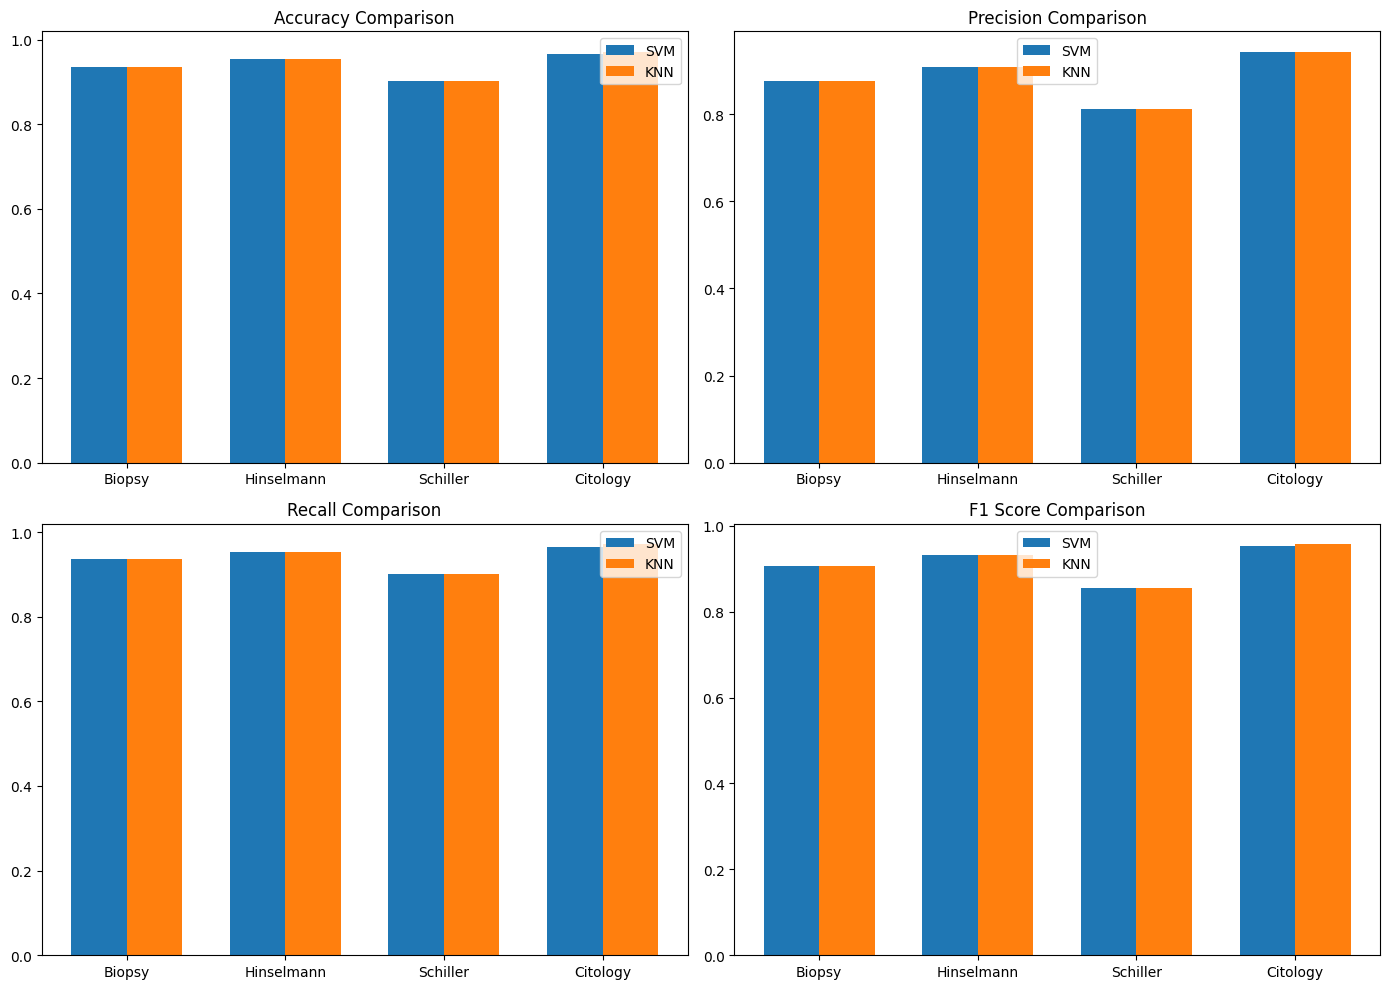

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
    }

# Dictionary to store evaluation results
evaluation_results = {}

# Evaluate the best trained SVM classifiers on the test set
svm_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
for target_column, best_svm_classifier in best_svm_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Evaluate the SVM model
    results = evaluate_model(best_svm_classifier, X_test_selected, y_test[target_column])
    evaluation_results[f"SVM_{target_column}"] = results

    # Store metrics
    svm_metrics['accuracy'].append(results['accuracy'])
    svm_metrics['precision'].append(results['precision'])
    svm_metrics['recall'].append(results['recall'])
    svm_metrics['f1_score'].append(results['f1_score'])

# Evaluate the best trained KNN classifiers on the test set
knn_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
for target_column, best_knn_classifier in best_knn_classifiers.items():
    feature_indices = [X_train.columns.get_loc(col) for col in selected_features[target_column]]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Evaluate the KNN model
    results = evaluate_model(best_knn_classifier, X_test_selected, y_test[target_column])
    evaluation_results[f"KNN_{target_column}"] = results

    # Store metrics
    knn_metrics['accuracy'].append(results['accuracy'])
    knn_metrics['precision'].append(results['precision'])
    knn_metrics['recall'].append(results['recall'])
    knn_metrics['f1_score'].append(results['f1_score'])

# Extract metrics for plotting
targets = y_test.columns
x = np.arange(len(targets))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy comparison
axs[0, 0].bar(x - width/2, svm_metrics['accuracy'], width, label='SVM')
axs[0, 0].bar(x + width/2, knn_metrics['accuracy'], width, label='KNN')
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(targets)
axs[0, 0].legend()

# Precision comparison
axs[0, 1].bar(x - width/2, svm_metrics['precision'], width, label='SVM')
axs[0, 1].bar(x + width/2, knn_metrics['precision'], width, label='KNN')
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(targets)
axs[0, 1].legend()

# Recall comparison
axs[1, 0].bar(x - width/2, svm_metrics['recall'], width, label='SVM')
axs[1, 0].bar(x + width/2, knn_metrics['recall'], width, label='KNN')
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(targets)
axs[1, 0].legend()

# F1 Score comparison
axs[1, 1].bar(x - width/2, svm_metrics['f1_score'], width, label='SVM')
axs[1, 1].bar(x + width/2, knn_metrics['f1_score'], width, label='KNN')
axs[1, 1].set_title('F1 Score Comparison')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(targets)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


The figures above show that the performance of the K-Nearest Neighbor (KNN) and Support Vector Machine (SVM) models is quite close in most areas, including accuracy, precision, and recall.

However, there is a significant difference in the F1-score and recall score for the 'Citology' target, with KNN outperforming SVM slightly. This suggests that KNN performs slightly better at striking a compromise between accuracy and recall for this particular target.

Based on our observations, we may deduce that:

- KNN generally performs comparably to SVM in terms of accuracy, precision, and recall across most targets.

- For the 'Citology' target, KNN shows a slight edge in F1-score and recall score, suggesting it may be a better choice for this particular prediction task.

These findings highlight the importance of taking into consideration both models' performance metrics and target-specific requirement when selecting the appropriate machine learning algorithm.

As a result, we may infer that K-Nearest Neighbor (KNN) is a better fit for this data.

